In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataterm/dataterm (2).pkl
/kaggle/input/pickle-war-dataset/dataframe.pkl


In [6]:
import pandas as pd
import pickle

dtm_pickle_file_path = '/kaggle/input/dataterm/dataterm (2).pkl'

with open(dtm_pickle_file_path, 'rb') as file:
    dtm = pickle.load(file)
    
dtm

,aa,abandoned,abhinandan,ability,able,abm,abortion,absolute,absolutely,absorbed,...,zelenksy,zelensky,zelenskyy,zhytomyr,zionazi,zoka,zone,zones,zoomed,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


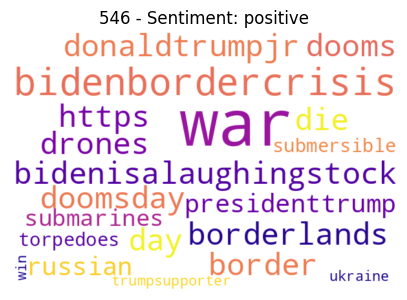

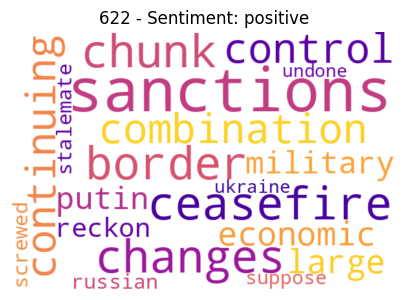

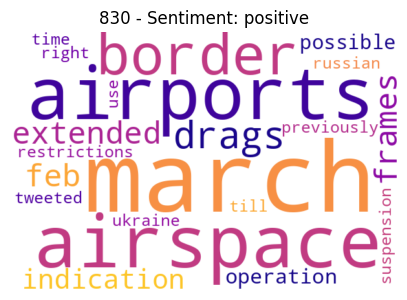

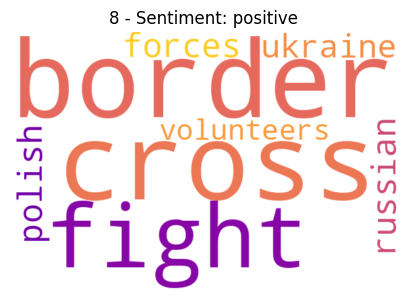

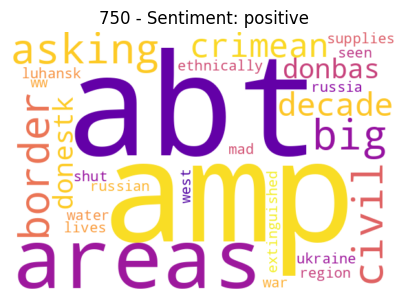

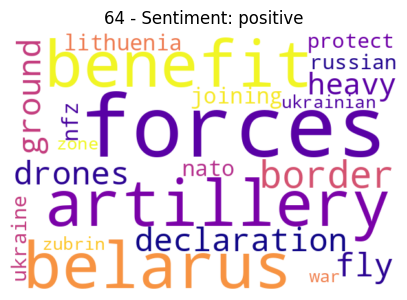

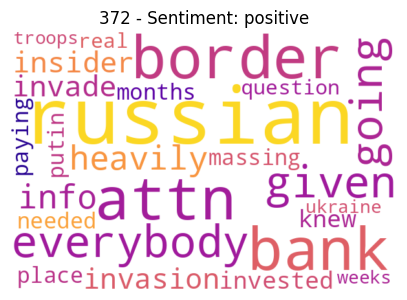

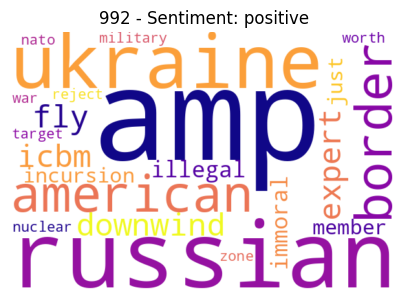

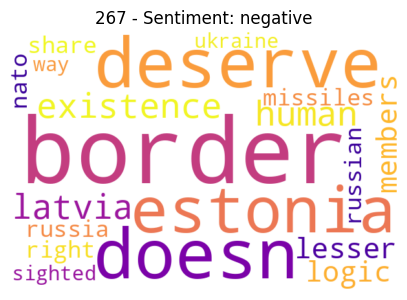

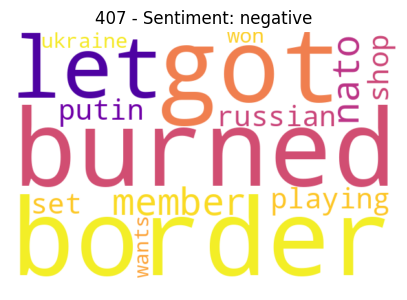

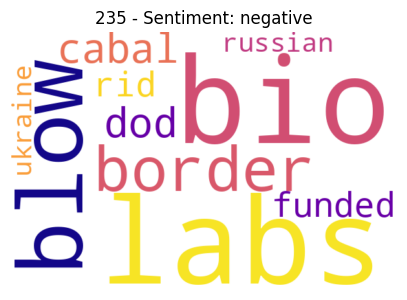

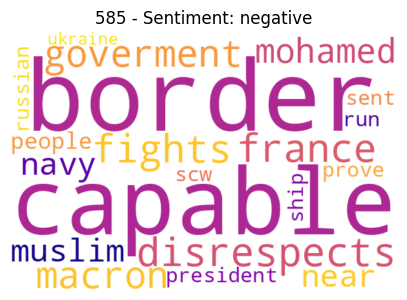

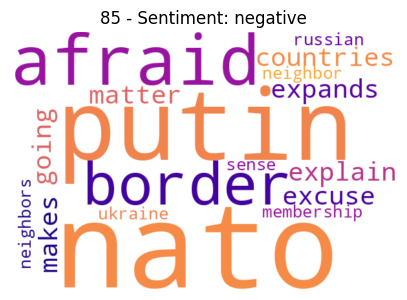

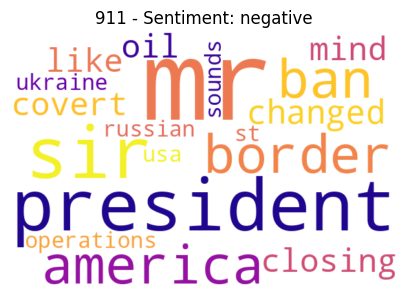

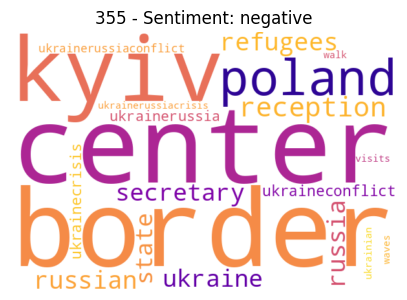

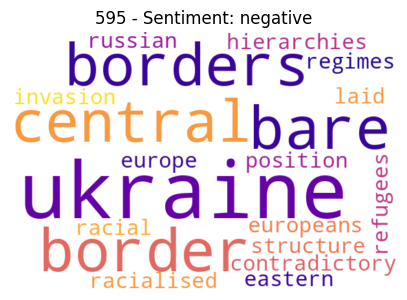

In [7]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

num_review = 16


# We have a 'sentiment' column in DataFrame with values like 'positive' and 'negative'
dtm['sentiment'] = ['positive', 'negative'] * (len(dtm) // 2)

positive_reviews = dtm[dtm['sentiment'] == 'positive'].index
negative_reviews = dtm[dtm['sentiment'] == 'negative'].index

# Randomly select positive and negative reviews
positive_samples = random.sample(list(positive_reviews), num_review // 2)
negative_samples = random.sample(list(negative_reviews), num_review // 2)

for review in positive_samples + negative_samples:
    routine_words = dtm.columns  # the columns represent words in DTM

    # Exclude the 'sentiment' column when creating the dictionary
    word_freq_dict = dict(zip(routine_words, dtm.loc[review].drop('sentiment').astype(int)))

    wordcloud = WordCloud(width=600, height=400, max_words=100, background_color='white', colormap='plasma') \
        .generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(5, 5))
    plt.title(f"{review} - Sentiment: {dtm.loc[review]['sentiment']}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [8]:
def display_top_words(review, sentiment, top_n=30):
    word_counts = dtm.loc[review].items()
    # Filter out the 'sentiment' column
    word_counts = [(word, count) for word, count in word_counts if word != 'sentiment']

    # Sort by count in descending order
    sorted_word_counts = sorted(word_counts, key=lambda x: x[1], reverse=True)

    print(f"Top {top_n} words for {sentiment} review '{review}':")
    for word, count in sorted_word_counts[:top_n]:
        print(f"{word}: {count}")

# Display top words for positive reviews
for review in positive_samples:
    display_top_words(review, 'Positive')

# Display top words for negative reviews
for review in negative_samples:
    display_top_words(review, 'Negative')

Top 30 words for Positive review '546':
war: 2
bidenbordercrisis: 1
bidenisalaughingstock: 1
border: 1
borderlands: 1
day: 1
die: 1
donaldtrumpjr: 1
dooms: 1
doomsday: 1
drones: 1
https: 1
presidenttrump: 1
russian: 1
submarines: 1
submersible: 1
torpedoes: 1
trumpsupporter: 1
ukraine: 1
win: 1
aa: 0
abandoned: 0
abhinandan: 0
ability: 0
able: 0
abm: 0
abortion: 0
absolute: 0
absolutely: 0
absorbed: 0
Top 30 words for Positive review '622':
sanctions: 2
border: 1
ceasefire: 1
changes: 1
chunk: 1
combination: 1
continuing: 1
control: 1
economic: 1
large: 1
military: 1
putin: 1
reckon: 1
russian: 1
screwed: 1
stalemate: 1
suppose: 1
ukraine: 1
undone: 1
aa: 0
abandoned: 0
abhinandan: 0
ability: 0
able: 0
abm: 0
abortion: 0
absolute: 0
absolutely: 0
absorbed: 0
absorbing: 0
Top 30 words for Positive review '830':
march: 2
airports: 1
airspace: 1
border: 1
drags: 1
extended: 1
feb: 1
frames: 1
indication: 1
operation: 1
possible: 1
previously: 1
restrictions: 1
right: 1
russian: 1
suspensi

In [9]:
from wordcloud import STOPWORDS

# Convert all values in dtm to numeric and coerce non-numeric values to NaN
dtm_numeric = dtm.apply(pd.to_numeric, errors='coerce')

# Drop rows/columns with all NaN values
dtm_numeric = dtm_numeric.dropna(axis=0, how='all').dropna(axis=1, how='all')

all_top_words = dtm_numeric.stack().groupby(level=1).sum().nlargest(30)

print("Most common top words across all reviews:\n", all_top_words)

custom_stopwords = set(STOPWORDS)
custom_stopwords.add("like")

Most common top words across all reviews:
 ukraine      1243
russian      1143
border       1075
russia        401
nato          397
putin         210
war           144
amp           129
forces        124
troops        118
people        105
ukrainian      97
poland         93
military       89
near           74
invasion       73
polish         73
want           70
countries      66
just           66
cross          60
did            59
fight          59
country        58
stop           52
army           51
right          50
weapons        50
know           49
russians       48
dtype: int64


In [10]:
sw_list=list(custom_stopwords)

In [11]:
word_occurrences = {'positive': {}, 'negative': {}}

for review in dtm.index:
    sentiment = dtm.loc[review, 'sentiment']  # 'sentiment' is the column name
    routine_words = dtm.loc[review].index
    
    for word in routine_words:
        if word not in word_occurrences[sentiment]:
            word_occurrences[sentiment][word] = 1
        else:
            word_occurrences[sentiment][word] += 1

# Create separate DataFrames for positive and negative sentiments
positive_occurrences_df = pd.DataFrame(list(word_occurrences['positive'].items()), columns=['Word', 'Occurrences'])
negative_occurrences_df = pd.DataFrame(list(word_occurrences['negative'].items()), columns=['Word', 'Occurrences'])

# Sort DataFrames by occurrences in descending order
positive_occurrences_df = positive_occurrences_df.sort_values(by='Occurrences', ascending=False)
negative_occurrences_df = negative_occurrences_df.sort_values(by='Occurrences', ascending=False)

# Print the DataFrames
print("Positive Sentiment Word Occurrences:")
print(positive_occurrences_df)

print("\nNegative Sentiment Word Occurrences:")
print(negative_occurrences_df)

Positive Sentiment Word Occurrences:
           Word  Occurrences
0            aa          500
3000    pouring          500
3006     pozdro          500
3005     powers          500
3004   powerful          500
...         ...          ...
1507     filled          500
1508    filling          500
1509       film          500
1510      final          500
4502  sentiment          500

[4503 rows x 2 columns]

Negative Sentiment Word Occurrences:
           Word  Occurrences
0            aa          500
3000    pouring          500
3006     pozdro          500
3005     powers          500
3004   powerful          500
...         ...          ...
1507     filled          500
1508    filling          500
1509       film          500
1510      final          500
4502  sentiment          500

[4503 rows x 2 columns]


In [12]:
unique_words_count = {}

for review_number in dtm.index:
    review_row = dtm.loc[review_number]
    num_unique_words = (review_row != 0).sum()
    unique_words_count[review_number] = num_unique_words
    
for review_number, num_unique_words in unique_words_count.items():
    print(f"{review_number}: {num_unique_words} unique words")

0: 19 unique words
1: 11 unique words
2: 12 unique words
3: 9 unique words
4: 26 unique words
5: 26 unique words
6: 28 unique words
7: 24 unique words
8: 9 unique words
9: 25 unique words
10: 13 unique words
11: 14 unique words
12: 23 unique words
13: 28 unique words
14: 22 unique words
15: 24 unique words
16: 23 unique words
17: 21 unique words
18: 29 unique words
19: 11 unique words
20: 20 unique words
21: 26 unique words
22: 12 unique words
23: 21 unique words
24: 25 unique words
25: 23 unique words
26: 22 unique words
27: 23 unique words
28: 15 unique words
29: 21 unique words
30: 23 unique words
31: 21 unique words
32: 24 unique words
33: 18 unique words
34: 20 unique words
35: 17 unique words
36: 21 unique words
37: 23 unique words
38: 21 unique words
39: 17 unique words
40: 22 unique words
41: 25 unique words
42: 24 unique words
43: 17 unique words
44: 16 unique words
45: 17 unique words
46: 10 unique words
47: 24 unique words
48: 20 unique words
49: 21 unique words
50: 19 uniqu

In [7]:
print(data_dtm.shape) 
print(data_dtm2.shape)

(1000, 4502)
(272482, 7)


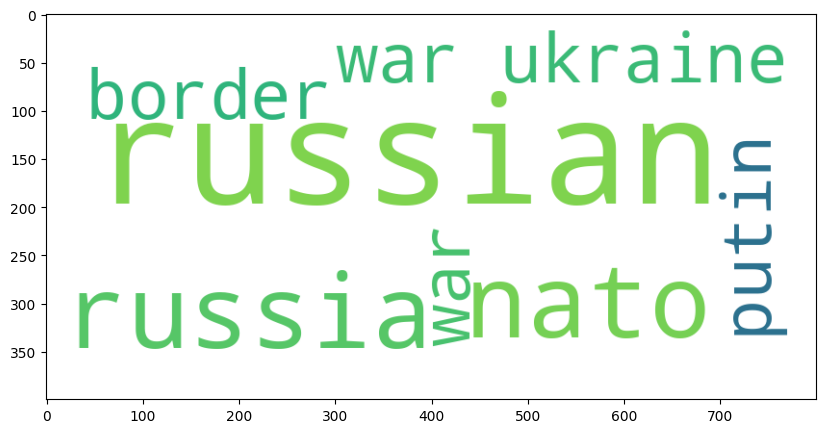

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the document-term matrix to a dictionary of word frequencies
word_freq = dict(zip(cv.get_feature_names_out(), data_dtm.sum(axis=0)))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()


In [9]:
# Sum the frequencies of each word across all documents
word_freq = data_dtm.sum(axis=0)

# Create a DataFrame to store word frequencies
word_freq_df = pd.DataFrame(word_freq, columns=['frequency'])

# Sort the DataFrame by word frequencies in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Take the top 05 words
top_50_words = word_freq_df.head(50)

# Display the top 50 words
print(top_50_words)


            frequency
ukraine          1243
russian          1143
border           1075
russia            401
nato              397
putin             210
war               144
amp               129
forces            124
troops            118
people            105
ukrainian          97
poland             93
military           89
near               74
polish             73
invasion           73
want               70
just               66
countries          66
cross              60
fight              59
did                59
country            58
stop               52
army               51
right              50
weapons            50
know               49
russians           48
think              48
like               45
students           45
western            43
missiles           43
usa                42
eastern            41
biden              41
don                40
state              40
does               40
say                39
close              38
soldiers           37
ukrainians

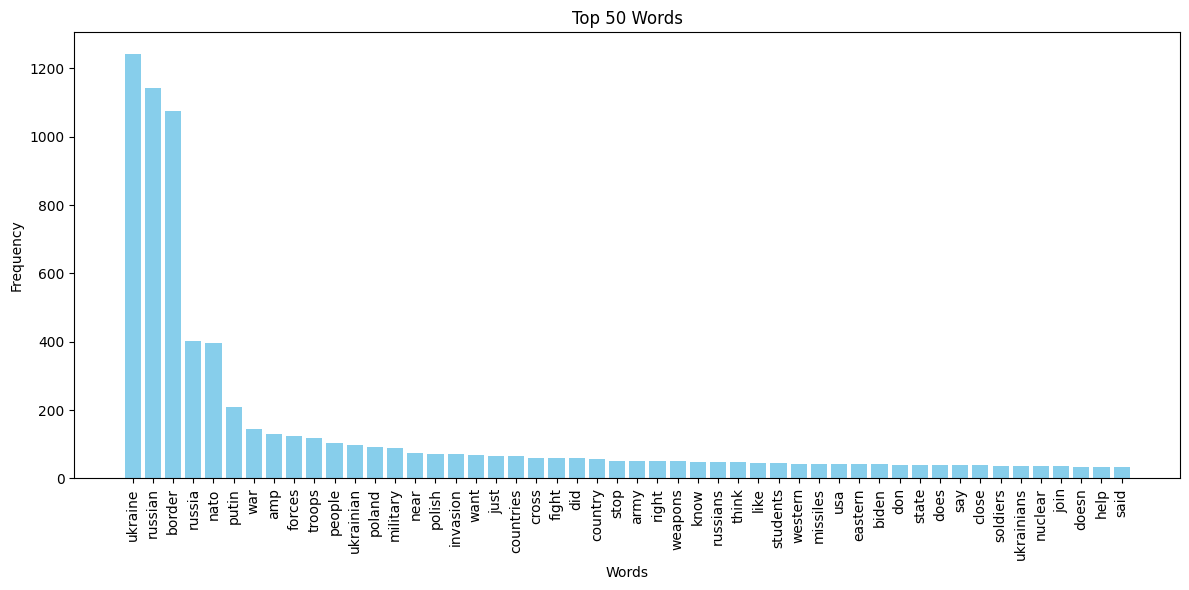

In [10]:
import matplotlib.pyplot as plt

# Assuming top_50_words is your DataFrame containing the top 30 words and their frequencies
# If you've already run the code you provided, you can directly use top_30_words variable

# Plot the top 50 words as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_50_words.index, top_50_words['frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


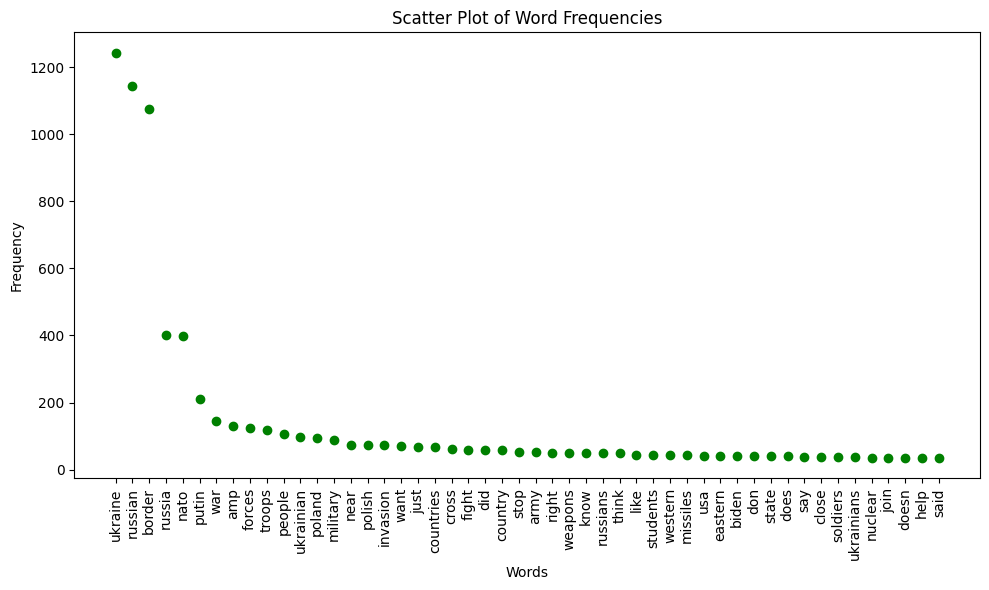

In [11]:
import matplotlib.pyplot as plt

# Assuming top_50_words is your DataFrame containing the top 50 words and their frequencies
# If you've already run the code you provided, you can directly use top_50_words variable

# Plot the scatter plot of word frequencies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_50_words)), top_50_words['frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Word Frequencies')
plt.xticks(range(len(top_50_words)), top_50_words.index, rotation=90)
plt.tight_layout()
plt.show()




In [12]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create lists to store sentiment scores
scores = []

# Iterate over each tweet in the 'content' column
for content in tweets['content']:
    # Perform sentiment analysis on the tweet
    sentiment_scores = analyzer.polarity_scores(content)
    
    # Extract sentiment scores
    compound = sentiment_scores["compound"]
    pos = sentiment_scores["pos"]
    neu = sentiment_scores["neu"]
    neg = sentiment_scores["neg"]
    
    # Append the scores to the list
    scores.append({"Compound": compound,
                   "Positive": pos,
                   "Negative": neg,
                   "Neutral": neu
                  })

# Convert the list of scores into a DataFrame
sentiments_score = pd.DataFrame(scores)

# Join the DataFrame of sentiment scores with the original DataFrame
tweets = pd.concat([tweets, sentiments_score], axis=1)
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,place,hashtags,cashtags,Searh,tokenized_review,clean_content,Compound,Positive,Negative,Neutral
0,snscrape.modules.twitter.Tweet,https://twitter.com/donveach/status/1500259722...,2022-03-05,is that the same expensive and ineffective bor...,Is that the same expensive and ineffective bor...,1.500260e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,0.0,1.0,...,NaN,NaN,NaN,Russian border Ukraine,"[is, that, the, same, expensive, and, ineffect...",is that the same expensive and ineffective bor...,-0.4404,0.00,0.115,0.885
1,snscrape.modules.twitter.Tweet,https://twitter.com/deliveryman199/status/1500...,2022-03-05,so the americans are dressing up as russ...,@DonWaifu @gabehayes @aaronjmate So the Americ...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",1.0,0.0,2.0,...,NaN,NaN,NaN,Russian border Ukraine,"[so, the, americans, are, dressing, up, as, ru...",so the americans are dressing up as russians c...,0.0000,0.00,0.000,1.000
2,snscrape.modules.twitter.Tweet,https://twitter.com/JDiozzi/status/15002591158...,2022-03-05,maybe if one military unit from ukraine crosse...,Maybe if one military unit from Ukraine crosse...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,0.0,0.0,...,NaN,NaN,NaN,Russian border Ukraine,"[maybe, if, one, military, unit, from, ukraine...",maybe if one military unit from ukraine crosse...,-0.2960,0.00,0.115,0.885
3,snscrape.modules.twitter.Tweet,https://twitter.com/Mom2ShihTzu/status/1500258...,2022-03-05,volunteers cross polish border into ukraine to...,Volunteers cross Polish border into Ukraine to...,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,1.0,2.0,...,NaN,NaN,NaN,Russian border Ukraine,"[volunteers, cross, polish, border, into, ukra...",volunteers cross polish border into ukraine to...,-0.3818,0.00,0.224,0.776
4,snscrape.modules.twitter.Tweet,https://twitter.com/SiliconMatters/status/1500...,2022-03-05,but theres no russian aircraft flying nea...,@MarkHertling BUT... theres no Russian aircraf...,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",0.0,1.0,4.0,...,NaN,NaN,NaN,Russian border Ukraine,"[but, theres, no, russian, aircraft, flying, n...",but theres no russian aircraft flying near lvi...,-0.8924,0.06,0.259,0.681


In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

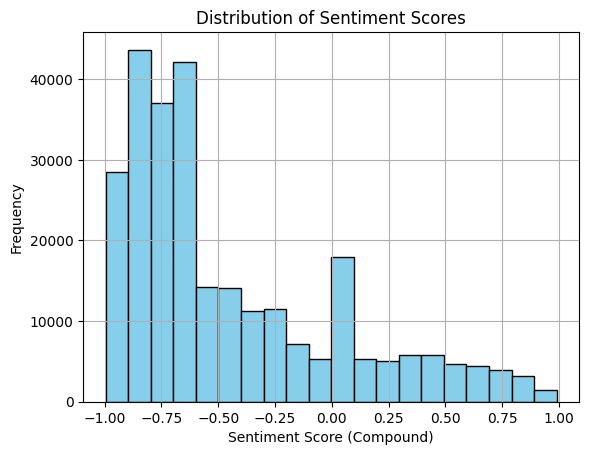

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment scores
plt.hist(tweets['Compound'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [16]:
# Create a list of conditions
conditions = [
    (tweets['Compound'] <= -0.5),
    (tweets['Compound'] > -0.5) & (tweets['Compound'] < 0.5),
    (tweets['Compound'] > 0.5)
]

# Create a list of values for each condition
values = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Category' and use np.select to assign values based on conditions
tweets['Category'] = np.select(conditions, values)

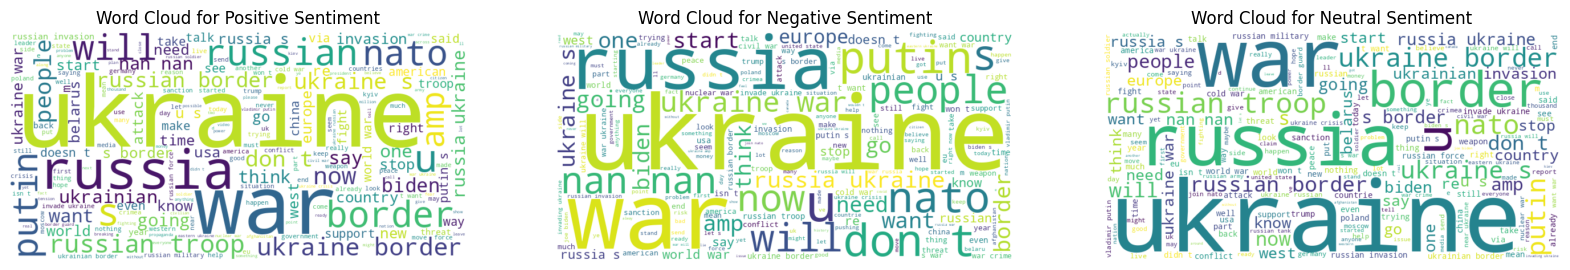

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets DataFrame for positive, negative, and neutral sentiments
positive_tweets = tweets[tweets['Category'] == 'Positive'].copy()
negative_tweets = tweets[tweets['Category'] == 'Negative'].copy()
neutral_tweets = tweets[tweets['Category'] == 'Neutral'].copy()

# Convert 'content' column to strings and drop any NaN values
positive_tweets['content'] = positive_tweets['content'].astype(str)
negative_tweets['content'] = negative_tweets['content'].astype(str)
neutral_tweets['content'] = neutral_tweets['content'].astype(str)

# Concatenate all positive, negative, and neutral tweets into single strings
positive_text = ' '.join(positive_tweets['content'])
negative_text = ' '.join(negative_tweets['content'])
neutral_text = ' '.join(neutral_tweets['content'])

# Generate word clouds for positive, negative, and neutral sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the word clouds
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

plt.show()


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'positive_tweets' and 'negative_tweets' are DataFrames containing tweets for positive and negative sentiments respectively

# Initialize CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=30)

# Fit and transform positive tweets
positive_data_dtm = cv.fit_transform(positive_tweets['content'])

# Convert positive data to DataFrame
positive_data_dtm_df = pd.DataFrame(positive_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for positive sentiment
top_30_positive_words = positive_data_dtm_df.sum().sort_values(ascending=False)


# Print top 30 words for positive sentiment
print("Top 30 words for Positive Sentiment:")
print(top_30_positive_words)



Top 30 words for Positive Sentiment:
ukraine      18983
war          12442
russia        7749
russian       7577
border        6430
putin         3335
nato          2940
troops        2255
amp           1558
biden         1519
people        1416
just          1297
military      1281
world         1206
invasion      1169
ukrainian     1164
want          1101
don           1035
like          1017
country        851
forces         831
president      803
going          795
europe         755
think          738
stop           694
nan            669
belarus        659
near           644
know           638
dtype: int64


In [19]:
# Fit and transform negative tweets
negative_data_dtm = cv.fit_transform(negative_tweets['content'])

# Convert negative data to DataFrame
negative_data_dtm_df = pd.DataFrame(negative_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for negative sentiment
top_30_negative_words = negative_data_dtm_df.sum().sort_values(ascending=False)
# Print top 30 words for negative sentiment
print("\nTop 30 words for Negative Sentiment:")
print(top_30_negative_words)




Top 30 words for Negative Sentiment:
ukraine      178315
war          159435
russia        83503
russian       33583
putin         30748
nato          24571
border        20275
biden         16753
amp           15672
people        13803
world         13765
just          12781
want          12473
troops        11865
don           11249
like          10980
going         10210
military       8631
europe         8520
invasion       8356
country        7772
think          7766
nan            7667
stop           7371
start          6884
president      6778
ukrainian      6758
wants          6447
know           6216
invade         5949
dtype: int64


In [20]:
# Assuming 'neutral_tweets' is a DataFrame containing tweets for neutral sentiment

# Fit and transform neutral tweets
neutral_data_dtm = cv.fit_transform(neutral_tweets['content'])

# Convert neutral data to DataFrame
neutral_data_dtm_df = pd.DataFrame(neutral_data_dtm.toarray(), columns=cv.get_feature_names_out())

# Get top 30 words for neutral sentiment
top_30_neutral_words = neutral_data_dtm_df.sum().sort_values(ascending=False)

# Print top 30 words for neutral sentiment
print("\nTop 30 words for Neutral Sentiment:")
print(top_30_neutral_words)



Top 30 words for Neutral Sentiment:
ukraine      100616
war           61817
russian       43239
russia        41211
border        37283
putin         16661
nato          15272
troops        14052
amp            8583
biden          7963
military       7248
just           6813
people         6786
ukrainian      6290
world          6141
invasion       6031
want           5640
like           5295
don            5208
forces         4782
going          4540
country        4238
president      4181
europe         4156
belarus        3801
think          3740
says           3731
near           3651
stop           3515
said           3318
dtype: int64


In [21]:
category_counts = pd.DataFrame(tweets.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts / x.Counts.sum()) * 100)

print(category_counts)

          Counts  Percentage
Category                    
0          11545    4.064826
Negative  165598   58.304638
Neutral    89776   31.608819
Positive   17103    6.021717


In [22]:
# Filter out tweets with '0' category
tweets_filtered = tweets[tweets['Category'] != '0']

# Calculate the count and percentage again after removing '0' category
count = tweets_filtered['Category'].value_counts()
percentage = (tweets_filtered['Category'].value_counts() / len(tweets_filtered)) * 100

# Display the count and percentage
result = pd.concat([count, percentage], axis=1)
result.columns = ['Count', 'Percentage']
print(result)

           Count  Percentage
Category                    
Negative  165598   60.775038
Neutral    89776   32.948102
Positive   17103    6.276860


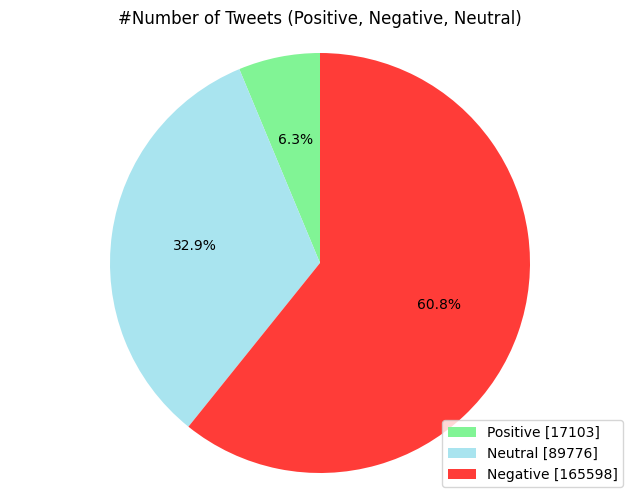

In [23]:
import matplotlib.pyplot as plt

# Counts of positive, neutral, and negative tweets
positive = 17103
neutral = 89776
negative = 165598

# Creating PieChart
labels = ['Positive [' + str(positive) + ']', 'Neutral [' + str(neutral) + ']', 'Negative [' + str(negative) + ']']
sizes = [positive, neutral, negative]
colors = ["#81F495", "#A9E4EF", "#FF3C38"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, colors=colors, startangle=90, autopct='%1.1f%%')
plt.legend(labels)
plt.title('#Number of Tweets (Positive, Negative, Neutral)')
plt.axis('equal')
plt.show()

In [24]:
# Calculate text length and word count for each tweet
tweets['text_len'] = tweets['content'].astype(str).apply(len)
tweets['text_word_count'] = tweets['content'].apply(lambda x: len(str(x).split()))

# Print average length of tweets and average word counts of tweets
print("Average length of tweets:", round(tweets['text_len'].mean()))
print("Average word count of tweets:", round(tweets['text_word_count'].mean()))


Average length of tweets: 178
Average word count of tweets: 31


In [25]:
#Top 50 tweets with maximum numbers of retweets
# Sort the tweets by 'retweetCount' in descending order and drop duplicate tweets
top_retweeted_tweets = tweets.sort_values('retweetCount', ascending=False)['content'].drop_duplicates().head(50)

# Print the top 50 retweeted tweets
print(top_retweeted_tweets)


56256     talked to    i m grateful to him for supportin...
3110      worrying reports  russians might have pointed ...
4357      ukraine says it will give russian soldiers tak...
6466      breaking  iconic spanish chef jos  andr s flie...
79529     breaking  russian billionaires mikhail fridman...
63961     russia invaded ukraine a week ago  i took this...
66999     the audacity of international media saying bra...
29581     the kremlin and its surrogates are asking you ...
203049    nice of the media to take a break from startin...
24997     no  ukraine did not    attack donetsk or luhan...
9075      breaking  senator tim kaine on msnbc just now ...
156238    russia  we aren t going to invade ukraine    u...
246717    ukraine is not our country and not our problem...
69375     conservatives accepted    from russia linked d...
56640         ukrainians join territorial defense forces...
246198    that s because joe biden is protecting his fam...
92475     war is always wrong  i m think

In [26]:
#Sorting the Tweets based on Retweet count
# Sort the DataFrame by 'retweetcount' column in descending order
sorted_tweets = tweets[['user', 'content', 'retweetCount', 'id']].sort_values(by='retweetCount', ascending=False)

# Display the sorted DataFrame
print(sorted_tweets)


                                                     user  \
56256   {'_type': 'snscrape.modules.twitter.User', 'us...   
3110    {'_type': 'snscrape.modules.twitter.User', 'us...   
4357    {'_type': 'snscrape.modules.twitter.User', 'us...   
6466    {'_type': 'snscrape.modules.twitter.User', 'us...   
79529   {'_type': 'snscrape.modules.twitter.User', 'us...   
...                                                   ...   
272403                                                NaN   
272411                                                NaN   
272426                                                NaN   
272459                                                NaN   
272460                                                NaN   

                                                  content  retweetCount  \
56256   talked to    i m grateful to him for supportin...       24134.0   
3110    worrying reports  russians might have pointed ...       20660.0   
4357    ukraine says it will give russian 

In [27]:
#most retweeted tweet
# Get the most retweeted tweet from the sorted DataFrame
most_retweeted = sorted_tweets.iloc[0]

# Print the text of the most retweeted tweet
print(most_retweeted['content'])


talked to    i m grateful to him for supporting ukraine with words and deeds  next week we will receive another batch of starlink systems for destroyed cities  discussed possible space projects    but i ll talk about this after the war 


**Comparison of Sentiment Score of Tweets by Indian and from Other Country**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


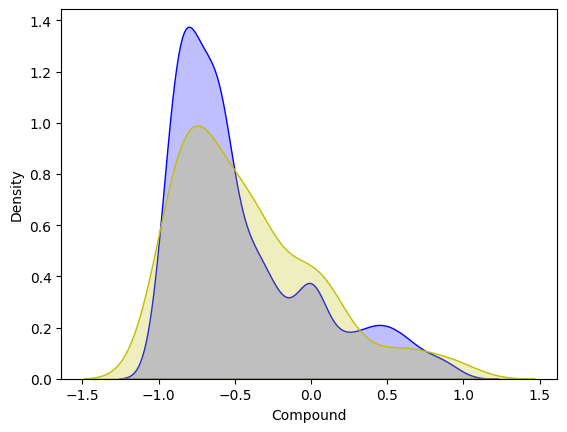

In [51]:
import seaborn as sns

# Plot distribution of sentiment scores for tweets with locations other than "Ukraine"
sns.kdeplot(data=tweets_filtered[~tweets_filtered["place"].str.contains('India')]["Compound"], color='b', fill=True)

# Plot distribution of sentiment scores for tweets with locations containing "Ukraine"
sns.kdeplot(data=tweets_filtered[tweets_filtered['place'].str.contains("India")]["Compound"], color='y', fill=True)

# Show the plots
plt.show()


**Comparison of Sentiment Score of Tweets from Ukraine and from other Country**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


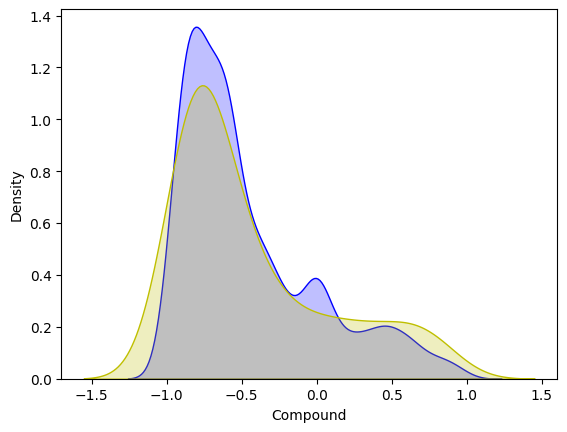

In [46]:
import seaborn as sns

# Plot distribution of sentiment scores for tweets with locations other than "Ukraine"
sns.kdeplot(data=tweets_filtered[~tweets_filtered["place"].str.contains('Ukraine')]["Compound"], color='b', fill=True)

# Plot distribution of sentiment scores for tweets with locations containing "Ukraine"
sns.kdeplot(data=tweets_filtered[tweets_filtered['place'].str.contains("Ukraine")]["Compound"], color='y', fill=True)

# Show the plots
plt.show()
